In [1]:
#import pandas 
import pandas as pd

In [2]:
#Read in the Dataset
pollen_load_data = pd.read_csv('../data/2015_pollen_load_data.csv')

In [3]:
#First look at the dataset
pollen_load_data

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1.00,Sinapis arvensis,Sinapis arvensis,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1.00,vegetation,Acer campestre,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1.00,vegetation,Acer campestre,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,1.00,Senecio jacobea,Rubus fruticosus agg.,Wild,30,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1756,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.50,Senecio jacobea,Senecio jacobea,Wild,95,47.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1757,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,1.00,Senecio jacobea,Senecio jacobea,Wild,55,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1758,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.50,Senecio jacobea,Sonchus arvensis,Wild,5,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Drop/rename columns
pollen_load_data.columns

Index(['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on',
       'Plant pollen', 'Status', 'Proportion', 'Weight', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [6]:
#Dropped unnamed columns 
pollen_load_data.drop(columns=['Unnamed: 11'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 12'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 13'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 14'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 15'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 16'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 17'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 18'], inplace=True)
pollen_load_data.drop(columns=['Unnamed: 19'], inplace=True)

In [7]:
#NaNs
pollen_load_data.isnull().sum() * 100 / len(pollen_load_data)

Farm            0.0
Type            0.0
Round           0.0
Date            0.0
Species         0.0
Load            0.0
Netted on       0.0
Plant pollen    0.0
Status          0.0
Proportion      0.0
Weight          0.0
dtype: float64

In [12]:
#Check column data types 
pollen_load_data.dtypes

Farm                   object
Type                   object
Round                  object
Date                   object
Species                object
Load                    int64
Netted on              object
Plant pollen           object
Status                 object
Proportion              int64
Weight                  int64
proportion_binned    category
dtype: object

In [13]:
#Reassign data types
pollen_load_data = pollen_load_data.astype({'Load': 'int', 'Weight': 'int'})
pollen_load_data.dtypes

Farm                   object
Type                   object
Round                  object
Date                   object
Species                object
Load                    int64
Netted on              object
Plant pollen           object
Status                 object
Proportion              int64
Weight                  int64
proportion_binned    category
dtype: object

In [15]:
#Bin columns
pollen_load_data['Date'].unique()
pollen_load_data['Date'].describe()

bins = [30, 60, 90, 120, 150]
labels = ['30-60', '61-90', '91-120', '121-150']

# Bin the 'Proportion' column 
pollen_load_data['proportion_binned'] = pd.cut(pollen_load_data['Proportion'], bins=bins, labels=labels, right=True)

pollen_load_data[['Proportion', 'proportion_binned']]

,Proportion,proportion_binned
0,100,91-120
1,100,91-120
2,100,91-120
3,100,91-120
4,100,91-120
...,...,...
1755,30,NaN
1756,95,91-120
1757,55,30-60
1758,5,NaN


In [17]:
#Seperate the data from one column into multiple columns 
pollen_load_data.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight,proportion_binned
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100,91-120
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0,Sinapis arvensis,Sinapis arvensis,Wild,100,25,91-120
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0,Sinapis arvensis,Sinapis arvensis,Wild,100,75,91-120
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100,91-120
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100,91-120


In [21]:
pollen_load_data['Plant pollen'].unique()

array(['Sinapis arvensis', 'Acer campestre', 'Taraxacum agg.',
       'Lamium album', 'Tripleurospermum inodorum',
       'Rubus fruticosus agg.', 'Ranunculus repens',
       'Heracleum sphondylium', 'Phacelia tanacetifolia',
       'Veronica persica', 'Leucanthemum vulgare', 'Brassica-type',
       'Chaerophyllum temulum', 'Rhamnus cathartica', 'Reseda lutea',
       'Viburnum lantana', 'Sisymbrium officinale', 'Silene dioica',
       'Ranunculus acris', 'Aegopodium podagraria', 'Cornus sanguinea',
       'Lychnis flos-cuculi', 'Daucus carota', 'Centaurea nigra',
       'Galium aparine', 'Knautia arvensis', 'Achillea millefolium',
       'Bryonia dioica', 'Centaurea scabiosa', 'Plantago spp',
       'Senecio vulgaris', 'Alliaria petiolata', 'Berberis vulgaris',
       'Anthriscus sylvestris', 'Tilia spp', 'Trifolium repens',
       'Medicago lupulina', 'Sherardia arvensis', 'Ilex aquifolium',
       'Sonchus asper', 'Torilis japonica', 'Sonchus arvensis',
       'Bellis perennis', 'Ve

In [18]:
#Remove duplicates
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]

pollen_load_data.drop_duplicates(keep="first", inplace=True)

In [19]:
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]


,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight,proportion_binned


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [22]:
#Saved as a variable
pollen_df = pd.read_csv("../data/2015_pollen_load_data.csv")
pollen_df.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1.00,Sinapis arvensis,Sinapis arvensis,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1.00,vegetation,Acer campestre,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1.00,vegetation,Acer campestre,Wild,100,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Count the occurrences of each status
avg_plant_pollen = pollen_df['Status'].value_counts().sort_values(ascending=False)
avg_plant_pollen

Status
Wild    1281
Sown     400
Crop      79
Name: count, dtype: int64

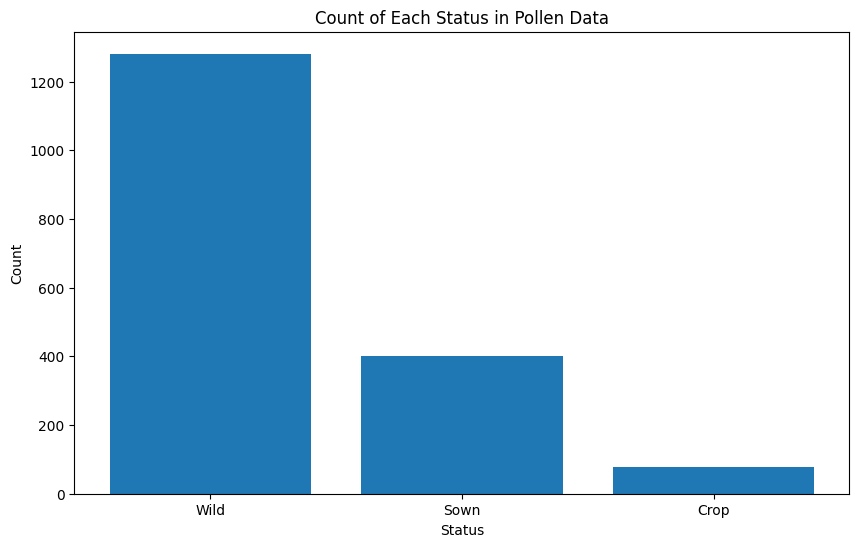

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(avg_plant_pollen.index, avg_plant_pollen.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Each Status in Pollen Data')
plt.show()

plt.tight_layout()
plt.show()

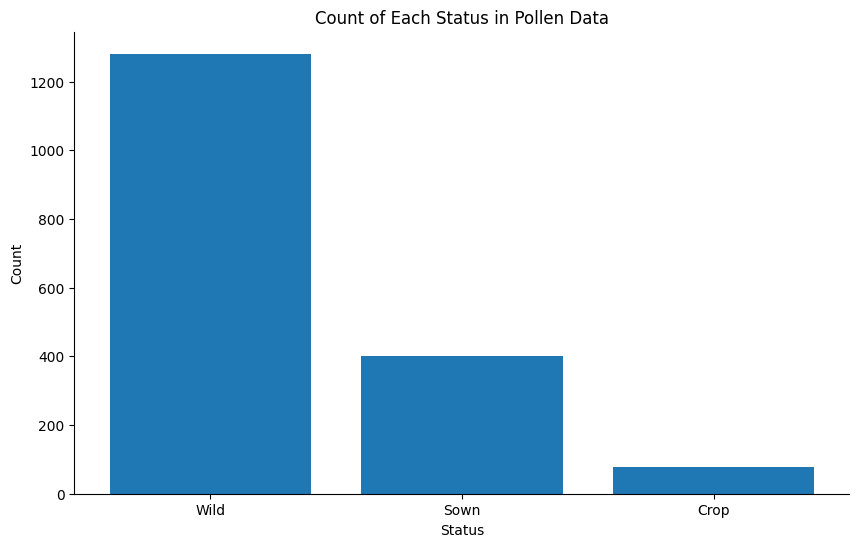

<Figure size 640x480 with 0 Axes>

In [31]:
plt.figure(figsize=(10, 6))
plt.bar(avg_plant_pollen.index, avg_plant_pollen.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Each Status in Pollen Data')
plt.show()

plt.tight_layout()
plt.show()

In [32]:
avg_species_streams = pollen_df.groupby("Species")["Load"].mean().sort_values(ascending=False)
avg_species_streams

Species
Andrena angustior              1.000000
Megachile centuncularis        1.000000
Osmia leaiana                  1.000000
Melitta tricincta              1.000000
Melitta leporina               1.000000
Andrena trimmerana             1.000000
Anthophora plumipes            1.000000
Lasioglossum puncticolle       1.000000
Osmia caerulescens             1.000000
Andrena carantonica            0.949074
Andrena florea                 0.916667
Lasioglossum zonulum           0.886364
Andrena alfkenella             0.875000
Colletes daviesanus            0.875000
Andrena fulva                  0.833333
Andrena nitida                 0.825658
Andrena flavipes               0.778153
Lasioglossum malachurum        0.750259
Lasioglossum laevigatum        0.750000
Lasioglossum leucozonium       0.743534
Andrena chrysosceles           0.699755
Andrena wilkella               0.666667
Andrena dorsata                0.660985
Andrena minutuloides           0.659091
Lasioglossum fulvicorne        0

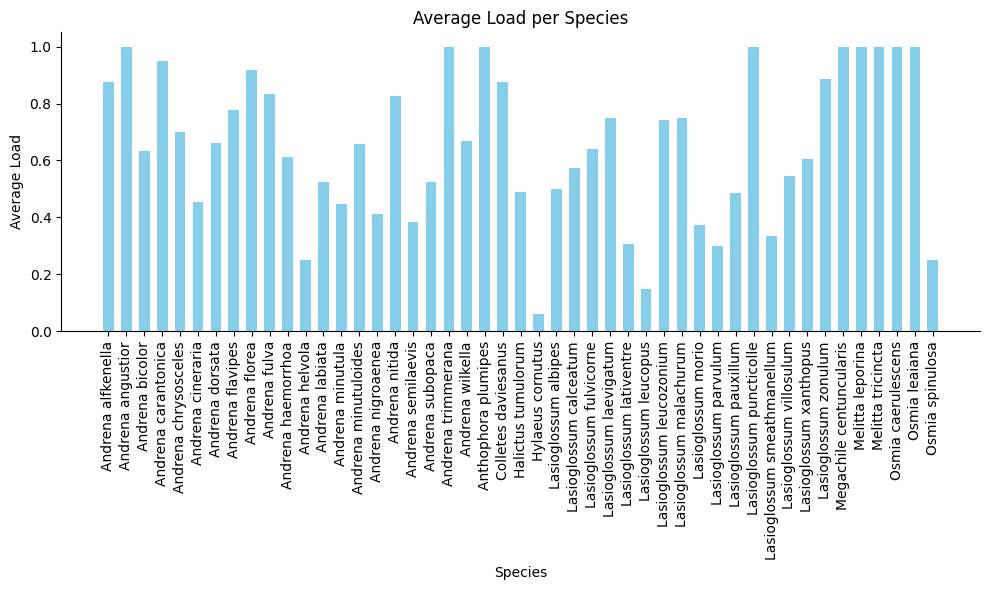

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avg_species.index, avg_species.values, color='skyblue', width=0.6)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Species')
plt.ylabel('Average Load')
plt.title('Average Load per Species')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()